In [1]:
import pandas as pd
import json 
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

C:\Users\danke\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\danke\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=Tru

ratings and number of votes 

In [2]:
#read in the data from imdb and filtered it based on number of votes and then saved the new data set to computer
if False:
    ratings_df = pd.read_csv(r"data/title.ratings.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"')
    above_10000_ratings = ratings_df[ratings_df["numVotes"] > 10000]
    above_10000_ratings.to_pickle(r"data/title.ratings.above_1000.pkl")

In [3]:
#recalled new data set
ratings_final_df = pd.read_pickle(r"data/title.ratings.above_1000.pkl")

other data set you didnt use

In [4]:
# principals_df = pd.read_csv(r"data/title.principals.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"')
# crew_df = pd.read_csv(r"data/title.crew.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"')

title +year

In [5]:
#filter based on type and runtime then save to compter
if False:
    basics_df = pd.read_csv(r"data/title.basics.tsv.gz", compression='gzip',header=0, sep='\t', quotechar='"',low_memory=False)
    basics_movie1 = basics_df[(basics_df["titleType"]== "movie")& (basics_df["runtimeMinutes"] != r"\N")]
    basics_movie2= basics_movie1.drop(columns="originalTitle")
    basics_movie3= basics_movie2.drop(columns="isAdult")
    basics_movie4= basics_movie3.drop(columns="endYear")
    
    basics_movie4.to_pickle(r"data/title.basics.movie.pkl")
     

In [6]:
#above_60_min["runtimeMinutes"].apply(lambda x: int(x)).min()

In [7]:
# recall new data set
basics_final_df = pd.read_pickle(r"data/title.basics.movie.pkl")

title +country

In [8]:

if False:
    akas_df = pd.read_csv(r"data/title.akas.tsv.gz", compression='gzip', header=0, sep='\t', quotechar='"',low_memory=False)
    above_GB_US = akas_df[(akas_df["region"] == "GB") | (akas_df["region"] == "US")]
    above_GB_US_clean1 = above_GB_US.drop(columns="isOriginalTitle")
    above_GB_US_clean2 = above_GB_US_clean1.drop(columns="attributes")
    above_GB_US_clean3 = above_GB_US_clean2.drop(columns="types")
    above_GB_US_clean4 = above_GB_US_clean3.drop(columns="language")
    above_GB_US_clean5 = above_GB_US_clean4.drop(columns="ordering")
    above_GB_US_cleanf = above_GB_US_clean5.drop(columns="title")

    above_GB_US_cleanf.to_pickle(r"data/title_region_df.pkl")

In [9]:
title_region_df = pd.read_pickle(r"data/title_region_df.pkl")

actors names, another data set i didnt use

In [10]:
#name_df = pd.read_csv(r"data/name.basics.tsv.gz", compression='gzip',header=0, sep='\t', quotechar='"',low_memory=False)

merging data sets from imdb, and then dropping unneccassary columns

In [11]:
title_region_df_f = title_region_df.rename(columns={'titleId': 'tconst'})
int_df = pd.merge(basics_final_df, title_region_df_f, how ='inner', on =['tconst'])
final_data = pd.merge(int_df, ratings_final_df, how ='inner', on =['tconst'])
last_df = final_data.drop_duplicates(subset= 'tconst')

In [12]:
last_df

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,region,averageRating,numVotes
0,tt0004972,movie,The Birth of a Nation,1915,195,"Drama,History,War",US,6.2,23893
5,tt0006864,movie,Intolerance,1916,163,"Drama,History",US,7.7,14980
9,tt0010323,movie,The Cabinet of Dr. Caligari,1920,76,"Fantasy,Horror,Mystery",GB,8.1,60492
11,tt0012349,movie,The Kid,1921,68,"Comedy,Drama,Family",US,8.3,120400
14,tt0012364,movie,The Phantom Carriage,1921,107,"Drama,Fantasy,Horror",GB,8.1,11671
...,...,...,...,...,...,...,...,...,...
24603,tt9860728,movie,Falling Inn Love,2019,98,"Comedy,Romance",US,5.6,17958
24605,tt9866072,movie,Holidate,2020,104,"Comedy,Romance",GB,6.1,53040
24607,tt9893250,movie,I Care a Lot,2020,118,"Comedy,Crime,Thriller",US,6.3,115370
24609,tt9898858,movie,Coffee & Kareem,2020,88,"Action,Comedy,Crime",US,5.1,12814


Bring in the kaggle data and merge it with imdb and cut out unneccessary columns

In [13]:
kaggle_data_1 = pd.read_csv(r"data/train.csv") 
kaggle_data_2 = pd.read_csv(r"data/test.csv") 
frames = [kaggle_data_1, kaggle_data_2]
kaggle_data_f = pd.concat(frames)
kaggle_data_f_clean = kaggle_data_f.drop(columns={"production_countries","id","poster_path","spoken_languages" ,"tagline" ,"homepage", "original_title", "original_language","popularity","overview","status","Keywords"})
kaggle_f = kaggle_data_f_clean.rename(columns={'imdb_id': 'tconst'})
final_data_1 = pd.merge(kaggle_f, last_df, how ='inner', on =['tconst'])
final_data_2 = final_data_1.drop_duplicates(subset= 'tconst')
f_data =  final_data_2.drop(columns={"release_date","titleType","runtimeMinutes"})

In [14]:
def eval_with_test(x):
    try :
        k = eval(x)
    except:
        k= "Tom cruise"
    return k

In [15]:
f_data["cast"] = f_data["cast"].apply(eval_with_test)
f_data["crew"] = f_data["crew"].apply(eval_with_test)
f_data["genres_x"] = f_data["genres_x"].apply(eval_with_test)
fd1 = f_data[(f_data["cast"] != "nothing") & (f_data["crew"] != "nothing")  & (f_data["genres_x"] != "nothing")]

In [16]:
fd = fd1.reset_index(drop=True)

In [17]:
fd['cast'][1004][0]['id']

6384

In [18]:
len(fd)

5310

In [19]:
G = nx.Graph()

In [20]:
N = nx.Graph()

In [21]:
N.clear()

In [22]:
#N.add_node(fd['cast'][1004][0]['name'])

In [23]:
#node practice
#N.add_node(fd['cast'][1004][0]['name'])
#N.add_node(fd['cast'][1004][1]['name'])
#N.add_edge(fd['cast'][1004][0]['name'], fd['cast'][1004][1]['name'])
#list(N.edges)
#    add_nodes_with_edges_in_cast(k)

In [24]:
#nx.draw(N)

In [25]:
def add_nodes_with_edges_in_cast(k):
    for i in range(len(fd['cast'][k])):
        G.add_node(fd['cast'][k][i]['name'])
        for n in range(i):
            G.add_edge(fd['cast'][k][i]['name'], fd['cast'][k][n]['name'])
    

In [26]:
if False:
    for m in range(len(fd)):
        add_nodes_with_edges_in_cast(m)
    nx.write_gpickle(G,r"data/G_graph.pkl")

In [27]:
G = nx.read_gpickle(r"data/G_graph.pkl")

In [28]:
len(list(G.nodes))

64042

In [29]:
De = nx.degree(G)

In [30]:
x = range(0, 2213)
plt.scatter(np.log(x), np.log(mylist))
#plt.savefig('test.png')
plt.show()

C:\Users\danke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


NameError: name 'mylist' is not defined

In [31]:
degree_f = list(G.degree)
degree_sorted = sorted(degree_f, key=lambda x: x[1])
degree_sorted.reverse()

In [153]:
degree_sorted

[('Samuel L. Jackson', 2212),
 ('Morgan Freeman', 1755),
 ('Bruce Willis', 1671),
 ('Stan Lee', 1613),
 ('Robert De Niro', 1558),
 ('Willem Dafoe', 1482),
 ('Matt Damon', 1401),
 ('Elizabeth Banks', 1383),
 ('Liam Neeson', 1370),
 ('Owen Wilson', 1370),
 ('J.K. Simmons', 1357),
 ('Michael Caine', 1330),
 ('Brad Pitt', 1298),
 ('Harrison Ford', 1283),
 ('Gary Oldman', 1267),
 ('James Franco', 1232),
 ('Johnny Depp', 1214),
 ('Stanley Tucci', 1200),
 ('Christopher Walken', 1196),
 ('Ben Affleck', 1187),
 ('John Goodman', 1186),
 ('Anne Fletcher', 1178),
 ('Ewan McGregor', 1171),
 ('Tom Hanks', 1154),
 ('Paul Giamatti', 1143),
 ('Robert Downey Jr.', 1133),
 ('Scarlett Johansson', 1131),
 ('Mark Wahlberg', 1119),
 ('Natalie Portman', 1108),
 ('Michael Shannon', 1108),
 ('Bill Murray', 1107),
 ('Tom Cruise', 1085),
 ('Woody Harrelson', 1072),
 ('Dan Aykroyd', 1067),
 ('Nicolas Cage', 1050),
 ('Dennis Quaid', 1048),
 ('Steve Buscemi', 1043),
 ('Bradley Cooper', 1040),
 ('Jonah Hill', 1040),


In [32]:
gf = []

In [33]:
for i in range(len(degree_sorted)):
    gf.append(degree_sorted[i][1])

In [152]:
gf

[2212,
 1755,
 1671,
 1613,
 1558,
 1482,
 1401,
 1383,
 1370,
 1370,
 1357,
 1330,
 1298,
 1283,
 1267,
 1232,
 1214,
 1200,
 1196,
 1187,
 1186,
 1178,
 1171,
 1154,
 1143,
 1133,
 1131,
 1119,
 1108,
 1108,
 1107,
 1085,
 1072,
 1067,
 1050,
 1048,
 1043,
 1040,
 1040,
 1035,
 1033,
 1027,
 1022,
 1020,
 997,
 997,
 996,
 994,
 992,
 984,
 978,
 974,
 969,
 966,
 961,
 958,
 956,
 953,
 946,
 945,
 942,
 939,
 932,
 930,
 929,
 925,
 920,
 919,
 913,
 913,
 911,
 904,
 903,
 902,
 898,
 896,
 896,
 892,
 891,
 890,
 890,
 890,
 889,
 889,
 889,
 886,
 883,
 881,
 880,
 868,
 867,
 863,
 862,
 861,
 859,
 857,
 855,
 852,
 849,
 844,
 844,
 844,
 843,
 843,
 843,
 838,
 837,
 836,
 835,
 835,
 834,
 833,
 832,
 831,
 829,
 823,
 822,
 820,
 819,
 818,
 818,
 814,
 814,
 808,
 807,
 804,
 799,
 796,
 793,
 793,
 793,
 792,
 791,
 791,
 790,
 790,
 782,
 781,
 781,
 778,
 776,
 773,
 770,
 770,
 770,
 769,
 768,
 766,
 766,
 764,
 764,
 763,
 759,
 759,
 759,
 756,
 755,
 753,
 752,
 7

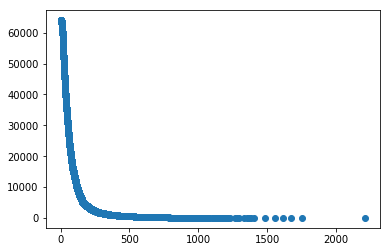

In [35]:
x = range(0, 64042)
plt.scatter(gf, x)
#plt.savefig('test.png')
plt.show()

In [36]:
count = 0
for i in degree_sorted:
    count +=1
    if i[0] == 'Matthew Modine':
        print(i)
        print(count)
        break

('Matthew Modine', 268)
1955


In [37]:
his = nx.degree_histogram(G)

In [38]:
his.sort()

In [39]:
his.reverse()

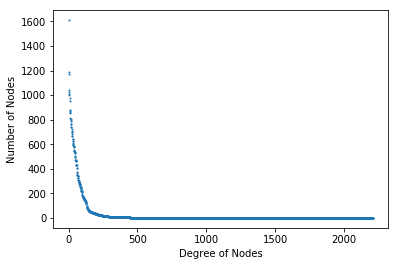

In [99]:
num = range(0,len(his))
plt.scatter(num, his, s=1)
#plt.title('Size of small connected subgraph relative to size of entire graph')
plt.xlabel('Degree of Nodes')
plt.ylabel('Number of Nodes')


#plt.savefig('test.png')
plt.savefig(r"degree.png", dpi = 600)
plt.show()

In [41]:
def func(x):
    if x == 0:
        return 0.1
    else:
        return x
l_p_his = [np.log(func(x)/64042) for x in his]
l_deg = [np.log(func(x)) for x in num]

In [42]:
type(l_p_his)

list

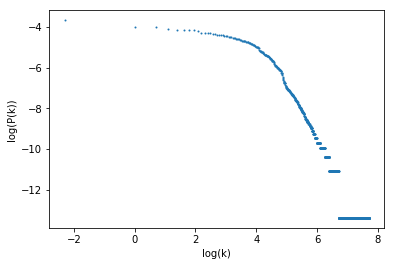

In [100]:

plt.scatter(l_deg, l_p_his, s=1)
#plt.title('Size of small connected subgraph relative to size of entire graph')
plt.xlabel('log(k)')
plt.ylabel('log(P(k))')

plt.savefig(r"log_log.png", dpi = 600)
#plt.savefig('test.png')
plt.show()

In [44]:
np.array(l_deg)

array([-2.30258509,  0.        ,  0.69314718, ...,  7.70074779,
        7.70120018,  7.70165236])

In [45]:
my_x1 = np.array(l_deg).reshape(1, -1)

In [46]:
my_x = np.transpose(my_x1)

In [47]:
my_x.shape

(2213, 1)

In [48]:
my_y = np.array(l_p_his)

In [49]:
my_y.shape

(2213,)

In [50]:
model = LinearRegression().fit(my_x, my_y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 3.7137282462869194
slope: [-2.30676642]


In [51]:
##break

In [52]:
if False:
    cluter = nx.clustering(G)
    cluter1 = dict(sorted(cluter.items(), key=lambda item: item[1]))
    cluter2 = dict(reversed(list(cluter1.items())))
    cluter3= pd.DataFrame.from_dict(cluter1, orient = 'index')
    cluter4= cluter3.reset_index()
    cluter4.columns=['actor','cluster coefficient'] 
    cluter4.to_pickle
    cluter4.to_pickle(r"data/cluster_coefficient.pkl")

In [53]:
cc = pd.read_pickle(r"data/cluster_coefficient.pkl")

In [54]:
cc.head(20)

,actor,cluster coefficient
0,Lou Dobbs,0.000000
1,Ted Koppel,0.000000
2,Eilidh Rankin,0.000000
3,Philippe Labro,0.000000
4,Samuel L. Jackson,0.032387
5,Bruce Willis,0.034221
6,Nicolas Cage,0.037534
7,Robert De Niro,0.038137
8,Matt Damon,0.039163
9,Liam Neeson,0.040370


#### eigenvector centrality

In [55]:
if False:
    a = nx.eigenvector_centrality(G)
    b = dict(sorted(a.items(), key=lambda item: item[1]))
    z = dict(reversed(list(b.items())))
    eigenvector_centality_ordered= pd.DataFrame.from_dict(z, orient = 'index')
    eigenvector_centality_ordered_indexed = eigenvector_centality_ordered.reset_index()
    eigenvector_centality_ordered_indexed.columns=['actor','eigenvector centality'] 
    eigenvector_centality_ordered_indexed.to_pickle
    eigenvector_centality_ordered_indexed.to_pickle(r"data/eigenvector_centality_ordered_indexed.pkl")

In [56]:
eig_cen = pd.read_pickle(r"data/eigenvector_centality_ordered_indexed.pkl")

In [154]:
eig_cen.head(10)

,actor,eigenvector centality
0,Samuel L. Jackson,0.077786
1,Stan Lee,0.063099
2,Morgan Freeman,0.060470
3,Elizabeth Banks,0.057172
4,Bruce Willis,0.054880
5,J.K. Simmons,0.054088
6,Willem Dafoe,0.053560
7,Owen Wilson,0.052552
8,Robert De Niro,0.051076
9,Ben Affleck,0.050758


In [58]:
nx.is_connected(G)

False

In [59]:
d = list(nx.connected_components(G)) 

In [60]:
if False:
    t = nx.transitivity(G)
    dummy_t = pd.DataFrame()
    dummy_t = pd.DataFrame()
    dummy_t[t] = t
    dummy_t.to_pickle(r"data/transitivity_G.pkl")
new_t = pd.read_pickle(r"data/transitivity_G.pkl")    

In [61]:
new_t

,0.335285


In [62]:
other = G.copy()
e = list(nx.connected_components(G)) 

In [63]:
lst_len = []

In [64]:
for i in range(1,len(e)):
    lst_len.append(len(e[i]))

In [65]:
lst_len.sort()

In [66]:
lst_len.reverse()

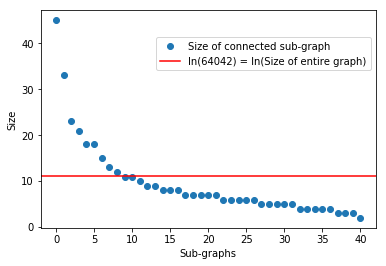

In [98]:
y = range(0, 41)
plt.plot(y, lst_len, 'o', label='Size of connected sub-graph')
#plt.savefig('test.png')

plt.axhline(y=11.06, color='r', linestyle='-', label='ln(64042) = ln(Size of entire graph)')
plt.legend(bbox_to_anchor=(1,0.8), loc="center right")

#plt.title('Size of small connected subgraph relative to size of entire graph')
plt.xlabel('Sub-graphs')
plt.ylabel('Size')
#plt.savefig(r"giant_plot.png", dpi = 600)
plt.show()

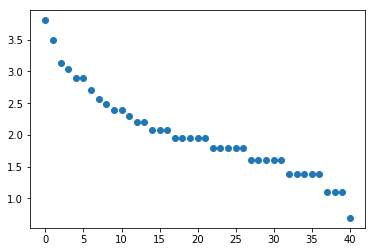

In [68]:
y = range(0, 41)
plt.plot(y, np.log(lst_len), 'o', label='dot')

In [69]:
disconnected_graph = pd.DataFrame()

In [70]:
disconnected_graph

""


In [71]:
#for i in range(len(e)):
#    disconnected_graph.append(len(e[i]))

In [72]:
for i in range(1,len(e)):
    for x in e[i]:
        other.remove_node(x)

In [73]:
len(list(G.nodes))

64042

In [74]:
#close_cen = nx.closeness_centrality(other)

In [75]:
# G.to_pickle(r"data/G.graph.pkl")
# Gn= pd.read_pickle(r"data/G.graph.pkl")

In [76]:
##jk = nx.betweenness_centrality(other,60)

In [77]:
#jk

In [78]:
#nx.diameter(other)

In [79]:
#degree_assortativity_coefficient

In [80]:
assort = nx.degree_assortativity_coefficient(G)

In [81]:
assort

0.06177410780522906

In [82]:
V = nx.Graph()

In [144]:
V.clear()

In [145]:
V.add_node(fd['cast'][656][0]['name'])

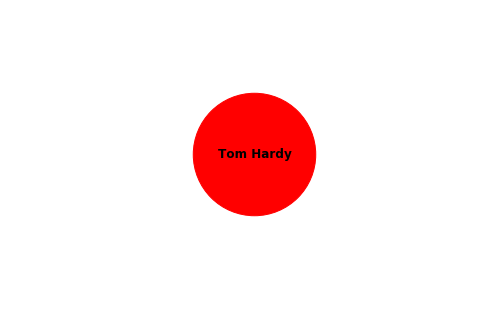

In [146]:
nx.draw(V, with_labels=True, font_weight='bold',node_size = 15000)
plt.savefig(r"node_1.png", dpi = 600)
plt.show()

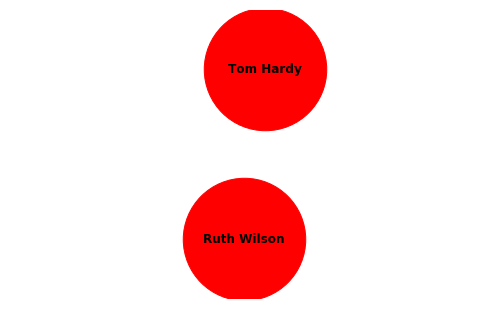

In [147]:
V.add_node(fd['cast'][656][1]['name'])
nx.draw(V, with_labels=True, font_weight='bold', node_size = 15000)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.savefig(r"node_2.png", dpi = 600)
plt.show()

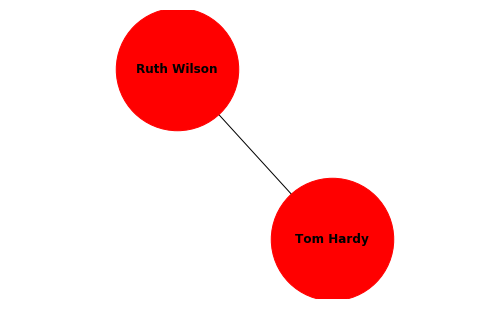

In [148]:
V.add_edge(fd['cast'][656][1]['name'],fd['cast'][656][0]['name'])
nx.draw(V, with_labels=True, font_weight='bold', node_size = 15000)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.savefig(r"node_2.png", dpi = 600)
plt.show()

In [112]:
def add_nodes_with(k):
    for i in range(len(fd['cast'][k])):
        V.add_node(fd['cast'][k][i]['name'])
        for n in range(i):
            V.add_edge(fd['cast'][k][i]['name'], fd['cast'][k][n]['name'])
    

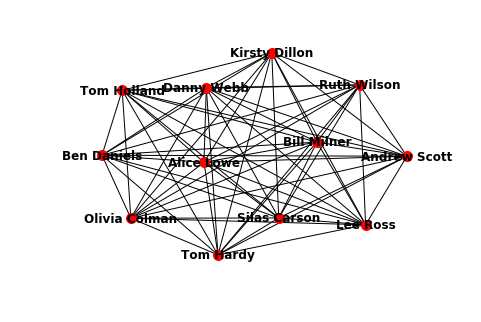

In [149]:
add_nodes_with(656)
nx.draw(V, with_labels=True, font_weight='bold', node_size = 100)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.savefig(r"node_3.png", dpi = 600)
plt.show()

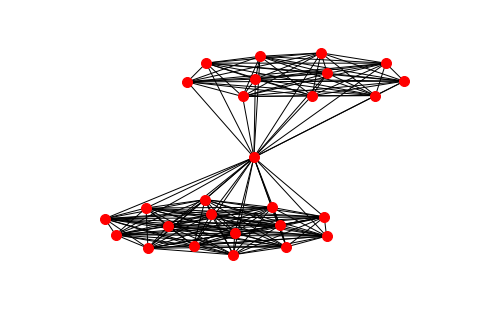

In [151]:
add_nodes_with(3903)
nx.draw(V, with_labels=False, font_weight='bold', node_size = 100)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.savefig(r"node_4.png", dpi = 600)
plt.show()

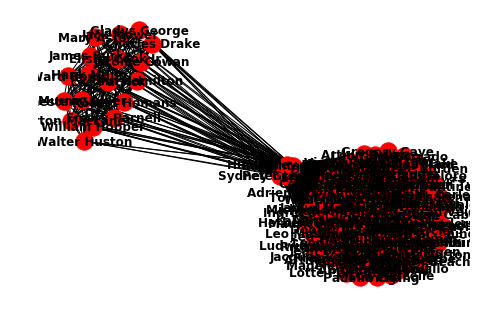

In [91]:
nx.draw(V, with_labels=True, font_weight='bold')

In [92]:

for i in range(len(fd['cast'][805])):
    V.add_node(fd['cast'][805][i]['name'])

In [125]:
for i in range(len(fd)):
    if fd['title'][i] == 'Rear Window':
        print(i) 

497


In [135]:
fd['cast'][497][19]['name']

'Gig Young'

In [94]:
len(list(G.edges))

2341934